# Classification

***k-NN***

# Ko'krak saratonini aniqlash

In [1]:
import pandas as pd
import numpy as np
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
392,903507,M,15.490,19.97,102.40,744.7,0.11600,0.15620,0.189100,0.091130,...,21.200,29.41,142.10,1359.0,0.16810,0.39130,0.55530,0.21210,0.3187,0.10190
522,91789,B,11.260,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,...,11.930,26.43,76.38,435.9,0.11080,0.07723,0.02533,0.02832,0.2557,0.07613
71,859711,B,8.888,14.64,58.79,244.0,0.09783,0.15310,0.086060,0.028720,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
84,8612080,B,12.000,15.65,76.95,443.3,0.09723,0.07165,0.041510,0.018630,...,13.670,24.90,87.78,567.9,0.13770,0.20030,0.22670,0.07632,0.3379,0.07924
157,8711216,B,16.840,19.46,108.40,880.2,0.07445,0.07223,0.051500,0.027710,...,18.220,28.07,120.30,1032.0,0.08774,0.17100,0.18820,0.08436,0.2527,0.05972
139,868871,B,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,...,11.920,15.77,76.53,434.0,0.13670,0.18220,0.08669,0.08611,0.2102,0.06784
480,912193,B,12.160,18.03,78.29,455.3,0.09087,0.07838,0.029160,0.015270,...,13.340,27.87,88.83,547.4,0.12080,0.22790,0.16200,0.05690,0.2406,0.07729
419,906290,B,11.160,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.010760,...,12.360,28.92,79.26,458.0,0.12820,0.11080,0.03582,0.04306,0.2976,0.07123
244,884180,M,19.400,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,...,21.650,30.53,144.90,1417.0,0.14630,0.29680,0.34580,0.15640,0.2920,0.07614
42,855625,M,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.210700,0.099610,...,24.090,33.17,177.40,1651.0,0.12470,0.74440,0.72420,0.24930,0.4670,0.10380


In [2]:
df.shape

(569, 32)

In [3]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder =LabelEncoder()

df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [5]:
df.drop(columns = ['id'], inplace = True)

In [7]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap= 'coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [9]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending = False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

# Machine Learnig

In [10]:
X = df.drop('diagnosis', axis = 1).values
y= df['diagnosis'].copy()

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
#train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.20, random_state = 12)

#k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
y_predicted = knn.predict(X_test)

# Modelni baholash

***Jaccard index***

In [16]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_predicted)

0.8958333333333334

***Confusion matrix***

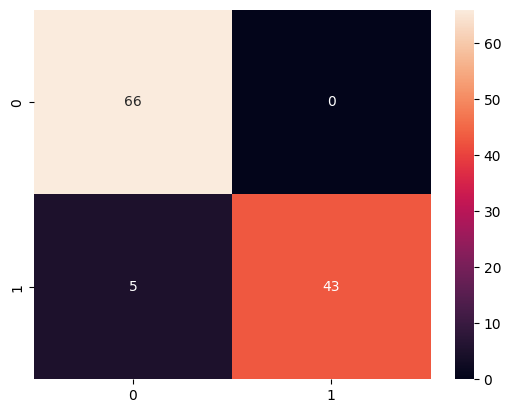

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test,y_predicted), annot= True)
plt.show()

In [19]:
confusion_matrix(y_test,y_predicted)

array([[66,  0],
       [ 5, 43]])

***Precision, recall, F1***

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
accuracy = accuracy_score(y_test, y_predicted)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=1.0
recall=0.8958333333333334
f1=0.945054945054945
accuracy=0.956140350877193


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



***Cross-validation yordamida tekshiramiz***

In [24]:
#cross_valudation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

In [25]:
#modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       357
           1       0.97      0.93      0.95       212

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



# Eng yaxshi k ni topish

***Grid Search yordamida***

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [27]:
knn_gscv.best_params_

{'n_neighbors': 9}

In [28]:
knn_gscv.best_score_

0.968390001552554

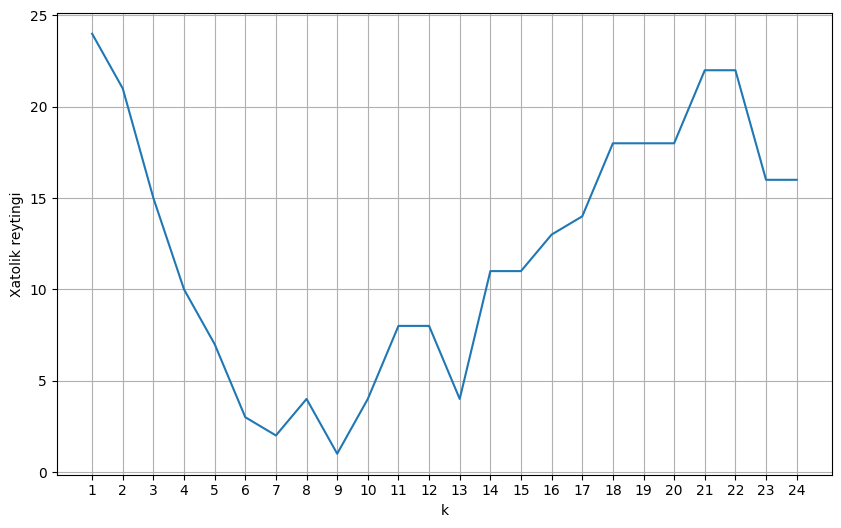

In [29]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()